# Lyapunov exponent as a function of k

We want to obtain a plot of the classical Lyapunov exponent as a function of $k$, the strength of the perturbation, for the Kicked top. 

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'
rcParams['font.size']=20
from scipy.optimize import curve_fit

In [45]:
p= np.pi/2
#k_min=0
#k_max=20
n_k_points=50
k_min=1
k_max=300
k_aux=np.linspace(np.log10(k_min), np.log10(k_max), n_k_points)
k_array=10**k_aux
#k=2 should be mostly regular, 2.5 mixed behaviour, 3 mostly chaotic, 6 fully chaotic
N_points=500
N_steps=100

In [46]:
def linear(x, m,n):
    return m*x+n
def expon(x, m, a):
    return a*np.exp(m*x)
def F(X, Y, Z, p, k):
    i=complex(0,1)
    aux=(X*np.cos(p)+ Z*np.sin(p)+ i*Y)*np.exp(i*k*(Z*np.cos(p)-X*np.sin(p)))
    X_=np.real(aux)
    Y_=np.imag(aux)
    Z_=-X*np.sin(p)+ Z*np.cos(p)
    return (X_, Y_, Z_)
def Generate_Close(epsilon):
    a=np.random.rand(1)
    b=np.random.rand(1)
    c=np.random.rand(1)-0.5
    d=np.random.rand(1)-0.5
    ϕ=2*np.pi*a
    θ=np.arccos(1-2*b)
    X_=np.zeros(2)
    Y_=np.zeros(2)
    Z_=np.zeros(2)
    X_[0]=np.sin(θ)*np.cos(ϕ)
    Y_[0]=np.sin(θ)*np.sin(ϕ)
    Z_[0]=np.cos(θ)   
    X_[1]=np.sin(θ+epsilon*c)*np.cos(ϕ+epsilon*d)
    Y_[1]=np.sin(θ+epsilon*c)*np.sin(ϕ+epsilon*d)
    Z_[1]=np.cos(θ+epsilon*c) 
    return (X_, Y_, Z_)

In [47]:
lyap_array=np.zeros(n_k_points)
sigma_lyap=np.zeros(n_k_points)
epsilon=1e-10
t_array=np.arange(0, N_steps, 1 )
d_array=np.zeros(len(t_array))
aux_d=np.zeros((len(t_array), N_points))
range1=np.argmin(np.abs(k_array-2.5))+1
range2=np.argmin(np.abs(k_array-3.5))+1
cutoff=1/np.exp(1) #Upper cutoff to which values we will fit
sigma_cutoff=1e-12 #lower cutoff to the error, we won't use values with error smaller than
#sigma_cutoff for some of the  parts of our computation, they can give a very small error 
#In the end, however, I don't know if we can do this or not
for s_loop in range(range1):
    #initial_points=np.zeros((N_points, 3))
    for k_loop in range(N_points):
        X, Y, Z=Generate_Close(epsilon)
        X_prev=X
        Y_prev=Y
        Z_prev=Z
        for j in range(N_steps):
            auxX, auxY, auxZ=F(X_prev, Y_prev, Z_prev, p, k_array[s_loop])
            aux_d[j, k_loop]=np.sqrt((auxX[0]-auxX[1])**2+(auxY[0]-auxY[1])**2+(auxZ[0]-auxZ[1])**2)
            X_prev=np.copy(auxX)
            Y_prev=np.copy(auxY)
            Z_prev=np.copy(auxZ)  
    d_array=np.mean(aux_d, axis=1)
    sigma_array=np.std(aux_d, axis=1)
    popt, pcov=curve_fit(expon, t_array[d_array<cutoff], d_array[d_array<cutoff], p0=[0,0], sigma=sigma_array[d_array<cutoff])
    lyap_array[s_loop]=popt[0]
    sigma_lyap[s_loop]=np.sqrt(pcov[0,0])
for s_loop in range(range1, range2):
    #initial_points=np.zeros((N_points, 3))
    for k_loop in range(N_points):
        X, Y, Z=Generate_Close(epsilon)
        X_prev=X
        Y_prev=Y
        Z_prev=Z
        for j in range(N_steps):
            auxX, auxY, auxZ=F(X_prev, Y_prev, Z_prev, p, k_array[s_loop])
            aux_d[j, k_loop]=np.sqrt((auxX[0]-auxX[1])**2+(auxY[0]-auxY[1])**2+(auxZ[0]-auxZ[1])**2)
            X_prev=np.copy(auxX)
            Y_prev=np.copy(auxY)
            Z_prev=np.copy(auxZ)  
    t_array=np.arange(0, N_steps, 1 )
    d_array=np.mean(aux_d, axis=1)
    sigma_array=np.std(aux_d, axis=1)
    t_array=t_array[sigma_array>sigma_cutoff]
    d_array=d_array[sigma_array>sigma_cutoff]
    sigma_array=sigma_array[sigma_array>sigma_cutoff]
    popt, pcov=curve_fit(expon, t_array[d_array<cutoff], d_array[d_array<cutoff], p0=[0,0], sigma=sigma_array[d_array<cutoff])
    lyap_array[s_loop]=popt[0]
    sigma_lyap[s_loop]=np.sqrt(pcov[0,0])
for s_loop in range(range2, n_k_points):
    #initial_points=np.zeros((N_points, 3))
    for k_loop in range(N_points):
        X, Y, Z=Generate_Close(epsilon)
        X_prev=X
        Y_prev=Y
        Z_prev=Z
        for j in range(N_steps):
            auxX, auxY, auxZ=F(X_prev, Y_prev, Z_prev, p, k_array[s_loop])
            aux_d[j, k_loop]=np.sqrt((auxX[0]-auxX[1])**2+(auxY[0]-auxY[1])**2+(auxZ[0]-auxZ[1])**2)
            X_prev=np.copy(auxX)
            Y_prev=np.copy(auxY)
            Z_prev=np.copy(auxZ)  
    t_array=np.arange(0, N_steps, 1 )
    d_array=np.mean(aux_d, axis=1)
    sigma_array=np.std(aux_d, axis=1)
    t_array=t_array[sigma_array>sigma_cutoff]
    d_array=d_array[sigma_array>sigma_cutoff]
    sigma_array=sigma_array[sigma_array>sigma_cutoff]
    popt, pcov=curve_fit(expon, t_array[d_array<cutoff], d_array[d_array<cutoff], p0=[1,0], sigma=sigma_array[d_array<cutoff])
    lyap_array[s_loop]=popt[0]
    sigma_lyap[s_loop]=np.sqrt(pcov[0,0])

/home/pablo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


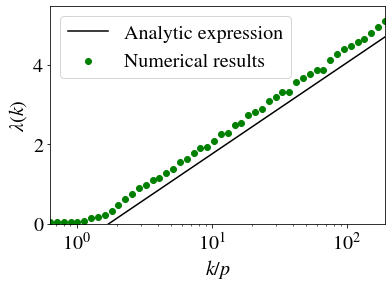

In [51]:
x=np.linspace(0, k_array[-1], 1000)
plt.figure()
plt.scatter(k_array/p, lyap_array, color='green', label='Numerical results')
#plt.errorbar(k_array, lyap_array, yerr=sigma_lyap, capsize=5, linestyle='None', color='red' )
plt.xlabel("$k/p$")
plt.ylabel("$\lambda(k)$")
plt.plot(x/p, np.log(x*np.abs(np.sin(p)))-1, color='black', label='Analytic expression')
plt.legend()
plt.ylim(0,)
plt.xscale('log')
plt.xlim(1/p,k_array[-1]/p)
#plt.errorbar(k_array, lyap_array, yerr=sigma_lyap, capsize=4)
plt.show()

In [49]:
#np.savetxt("ClassicalLyap.txt", lyap_array)